## Data Wrangling Project: WeRateDogs 

## Dataset Overview

- **Twitter archive:** This file is downlaoded from udacity servers. It comprises of tweet url,id, source and so on.

- **The Dog Image predictions**: This file is developed using neural network. It's link can be found on udacity server. There are columns p1, p2 and p3 that holds predicted dog breeds, and p1_conf, p2_conf and p3_conf shows the confidence of the algorithm used in the model. Here is the link: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

- **Twitter API** This file is in JSON format as data from API is available in one known format. It consist of  tweetid,source, text, followerscount, favoritecount, retweeted, retweetcount. Basically, it is a text document in a special format. The data is obtained programtically using Tweepy library. 

In [1]:
# importing packages
import numpy as np
import pandas as pd
import requests
import urllib
import tweepy 
import json
import os
import seaborn as sb
from tweepy import OAuthHandler
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import plotly.express as px
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline
sb.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'

# Steps in Data Wrangling:
   - Gather
   - Assess
   - Cean                                                                                                           
 ***You can iterate through the steps till you are satisfied with tidyness and quality of the dataset***

# Gathering Data

Importing **twitter-archive-enhanced.csv** downloaded from udacity server




In [2]:
twt_arch = pd.read_csv('twitter-archive-enhanced.csv')
twt_arch.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [3]:
twt_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [4]:
twt_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [5]:
twt_arch.duplicated().sum()

0

In [6]:
twt_arch.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

## Etraction of data from twitter API

### Importing the JSON file from Twitter API 
##### twitter_api.py: This is the Twitter API code to gather some of the required data for the project. Demonstration of how it works
Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

**NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:**
df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
**NOTE TO REVIEWER: this student had mobile verification issues so the following**
Twitter API code was sent to this student from a Udacity instructor
Tweet IDs for which to gather additional data via Twitter's API
  
tweet_ids = df.tweet_id.values
len(tweet_ids)

###################################################
###### PROVIDED BY UDACITY. NO NEED TO RUN! #######
###################################################

os.listdir('.')

#### Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
#### Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
#### This loop will likely take 20-30 minutes to run because of Twitter's rate limit
     for tweet_id in tweet_ids:
         count += 1
         print(str(count) + ": " + str(tweet_id))
         try:
             tweet = api.get_status(tweet_id, tweet_mode='extended')
             print("Success")
             json.dump(tweet._json, outfile)
             outfile.write('\n')
         except tweepy.TweepError as e:
             print("Fail")
             fails_dict[tweet_id] = e
             pass
 end = timer()
 print(end - start)
 print(fails_dict)

In [7]:
tweets_fetched = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweets_fetched.append(json.loads(line))

In [8]:
data_ = []

for twt in tweets_fetched:
    
    tweetid = twt['id']
    retweetcount = twt['retweet_count']
    retweeted = twt['retweeted']
    favoritecount = twt['favorite_count']
    followerscount = twt['user']['followers_count']
    text = twt['full_text']
    source = twt['source']
    
    data_.append({'id':tweetid,
                  'source':source,
                  'text': text,
                  'followers_count': followerscount,
                  'favorite_count': favoritecount,
                  'retweeted': retweeted,
                  'retweet_count': retweetcount
                  
                  })
    
data_tweets_api = pd.DataFrame(data_, columns=['id', 'source','text', 'followers_count','favorite_count','retweeted',
                                             'retweet_count'])


In [9]:
data_tweets_api.sample(7)

,id,source,text,followers_count,favorite_count,retweeted,retweet_count
1461,694669722378485760,"<a href=""http://twitter.com/download/iphone"" r...",This is Phil. He's an important dog. Can contr...,3200950,26068,False,13517
2330,666345417576210432,"<a href=""http://twitter.com/download/iphone"" r...",Look at this jokester thinking seat belt laws ...,3201018,307,False,146
1837,675891555769696257,"<a href=""http://twitter.com/download/iphone"" r...",This is Donny. He's summoning the demon monste...,3201002,2297,False,976
2016,672139350159835138,"<a href=""http://twitter.com/download/iphone"" r...",This pup has a heart on its ass and that is do...,3201006,1876,False,792
1513,690989312272396288,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",We've got a doggy down. Requesting backup. 12/...,3200951,6513,False,3282
2071,670995969505435648,"<a href=""http://twitter.com/download/iphone"" r...",Yea I can't handle this job anymore your dogs ...,3201008,1175,False,317
1280,708738143638450176,"<a href=""http://twitter.com/download/iphone"" r...",This is Coco. She gets to stay on the Bachelor...,3200947,2997,False,917


In [10]:
data_tweets_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2354 non-null   int64 
 1   source           2354 non-null   object
 2   text             2354 non-null   object
 3   followers_count  2354 non-null   int64 
 4   favorite_count   2354 non-null   int64 
 5   retweeted        2354 non-null   bool  
 6   retweet_count    2354 non-null   int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 112.8+ KB


### Getting images via url using requests library and writing to  `image-predictions.tsv` 

In [11]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)
    
os.listdir('.')

['.ipynb_checkpoints',
 'act_report.docx',
 'Analysis_of_STDs_in_US_for_1996-2011.ipynb',
 'image-predictions.tsv',
 'Insight 3.png',
 'insight 5.png',
 'Master_WeRateDogs_twitter_archive.csv',
 'Supporting Materials',
 'tweet-json.txt',
 'twitter-api.py',
 'twitter-archive-enhanced.csv',
 'twitter_archive_master.csv',
 'wrangle_act.ipynb',
 'wrangle_report.docx']

In [12]:
data_image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
data_image_predictions.head(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False


In [13]:
data_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# Assessing the data

### Visual Assessment
> Visual Assessment refers to visually displaying a portion  to get accquainted of gathered data 

In [14]:
twt_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [15]:
data_tweets_api

,id,source,text,followers_count,favorite_count,retweeted,retweet_count
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,3200889,39467,False,8853
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,3200889,33819,False,6514
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,3200889,25461,False,4328
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,3200889,42908,False,8964
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,3200889,41048,False,9774
...,...,...,...,...,...,...,...
2349,666049248165822465,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,3201018,111,False,41
2350,666044226329800704,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,3201018,311,False,147
2351,666033412701032449,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,3201018,128,False,47
2352,666029285002620928,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,3201018,132,False,48


In [16]:
data_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [17]:
# twitter_archieved.csv
twt_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
twt_arch[twt_arch.expanded_urls.isnull()].sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1774,678023323247357953,6.780211e+17,4.196984e+09,2015-12-19 01:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After getting lost in Reese's eyes for several...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
346,831926988323639298,8.319030e+17,2.068372e+07,2017-02-15 18:03:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@UNC can confirm 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
409,823333489516937216,8.233264e+17,1.582854e+09,2017-01-23 00:56:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@HistoryInPics 13/10,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [19]:
twt_arch.text.sample(3)

1871    When you're presenting a group project and the...
747     This is Scout. He really wants to kiss himself...
1727    Meet Penelope. She's a bacon frise. Total babe...
Name: text, dtype: object

In [20]:
# Checking for duplicates
twt_arch.duplicated().sum()

0

In [21]:
# twitter-api
data_tweets_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2354 non-null   int64 
 1   source           2354 non-null   object
 2   text             2354 non-null   object
 3   followers_count  2354 non-null   int64 
 4   favorite_count   2354 non-null   int64 
 5   retweeted        2354 non-null   bool  
 6   retweet_count    2354 non-null   int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 112.8+ KB


In [22]:
# Checking for duplicates
data_tweets_api.duplicated().sum()

0

In [23]:
# getting a sample of data_tweets_api
data_tweets_api.sample(7)

,id,source,text,followers_count,favorite_count,retweeted,retweet_count
747,779377524342161408,"<a href=""http://twitter.com/download/iphone"" r...",Have you ever seen such a smol pupper? Portabl...,3200901,9831,False,3613
2040,671538301157904385,"<a href=""http://twitter.com/download/iphone"" r...",This is Baxter. He's very calm. Hasn't eaten i...,3201007,993,False,436
114,870374049280663552,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She really likes the planet. Wou...,3200891,85011,False,27680
197,854365224396361728,"<a href=""http://twitter.com/download/iphone"" r...",This is Einstein. He's having a really good da...,3200891,20046,False,5159
635,793500921481273345,"<a href=""http://twitter.com/download/iphone"" r...",This is Fiona. She's an extremely mediocre cop...,3200900,11953,False,2786
1629,684481074559381504,"<a href=""http://twitter.com/download/iphone"" r...",Meet Pippa. She's an Elfin High Feta. Compact ...,3200951,4249,False,1320
616,796387464403357696,"<a href=""http://twitter.com/download/iphone"" r...",This is Snicku. He's having trouble reading be...,3200900,12334,False,4861


In [24]:
data_tweets_api.text.sample(7)

1739    This is Evy. She doesn't want to be a Koala. 9...
2296    After much debate this dog is being upgraded t...
707     This is Doc. He requested to be carried around...
1957    Sun burnt dog here. Quite large. Wants to prom...
235     This is Furzey. He's doing an elevated sandy z...
1524    This is Phred. He's an Albanian Flepperkush. T...
2093    Meet Vincent. He's a wild Adderall Cayenne. Sh...
Name: text, dtype: object

In [25]:
# image-predictions.tsv
data_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
# getting a sample of data_image_predictions
data_image_predictions.sample(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1085,718613305783398402,https://pbs.twimg.com/media/CfkG_PMWsAAH0MZ.jpg,1,Labrador_retriever,0.584580,True,German_short-haired_pointer,0.340657,True,Chesapeake_Bay_retriever,0.031975,True
1609,801115127852503040,https://pbs.twimg.com/media/Cx4h7zHUsAAqaJd.jpg,1,dalmatian,0.823356,True,English_setter,0.094602,True,bluetick,0.021953,True
668,683030066213818368,https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg,1,boxer,0.722218,True,bull_mastiff,0.193804,True,French_bulldog,0.055194,True
955,705239209544720384,https://pbs.twimg.com/media/CcmDUjFW8AAqAjc.jpg,1,Chihuahua,0.157950,True,toy_terrier,0.089920,True,Mexican_hairless,0.063225,True
198,669625907762618368,https://pbs.twimg.com/media/CUr9NjgU8AEpf5w.jpg,1,seat_belt,0.874502,False,golden_retriever,0.055408,True,Labrador_retriever,0.026854,True
1275,750056684286914561,https://pbs.twimg.com/media/Cmfx2oNW8AAGg4H.jpg,1,Saluki,0.484428,True,borzoi,0.263550,True,Labrador_retriever,0.077004,True
1077,717537687239008257,https://pbs.twimg.com/media/CfU0t75W4AAUo9V.jpg,1,golden_retriever,0.779356,True,Labrador_retriever,0.052511,True,kuvasz,0.049811,True


In [27]:
data_image_predictions.duplicated().sum()

0

In [28]:
# making copies of original data prior to cleaning
cpy_twt_arch = twt_arch.copy()
cpy_img_pred = data_image_predictions.copy()
cpy_twt_api = data_tweets_api.copy()


### Quality
Completeness, validity, accuracy, consistency (content issues)

- Replace "None" values to NaN using np.nan

#### Duplicates quality issues
- Renaming tweet_id to id which is a standard naming convention (datasets:- twt_arch, data_image_predictions)
- Incorrect datatype of tweet_id/id column (int -> str)
- Cleaning the values of source column (datasets: twt_arch, data_tweets_api)
- Removing retweets and replies as these columns are trivial (datasets: twt_arch, data_tweets_api)
- The data in text column is reduced to 50 characters, some information could be lost in extracting process(datasets: twt_arch, data_tweets_api)

#### twt_arch
- Invalid datatypes to timestamp
- Changing timestamp to date

#### data_tweets_api_
- Extracting, spliting and cleaning the text column for ratings 

#### data_image_predictions
- Correcting the letter casing in the prediction columns so there is consistency in format
- Giving proper names of the columns 


### Tidiness
- Remove columns that are not needed in analysis
    - twt_arch
        - source
        - in_reply_to_status_id
        - in_reply_to_user_id
        - text
        - retweeted_status_id
        - retweeted_status_user_id
        - retweeted_status_timestamp
        - rating_numerator 
        - rating_denominator 
        - expanded_urls	
    - data_tweets_api
        - text
        - retweeted    
    - data_image_predictions
        - img_num

- `twt_arch` columns doggo, floofer, pupper, puppo could be joined to form "dog_stage" column
    
- Finally use pd.merge() that combine all dataframes to twitter_master_archive 

# Data Cleaning

In [29]:
# making copies of original data prior to cleaning
cleaned_twt_arch = twt_arch.copy()
cleaned_img_predictions = data_image_predictions.copy()
cleaned_twt_api = data_tweets_api.copy()

In [30]:
# If copies are messed up then only run this code
# del cleaned_twt_arch
#  del cleaned_twt_api
# del cleaned_img_predictions

### Format for Markdown Commnetns in DATA CLEANING steps:
   > `Step description (dataframe name)`

### Quality

***Replacing "None" values to NaN*** `All datafranes`

In [31]:
# code
cleaned_twt_arch = cleaned_twt_arch.replace(value = np.nan, to_replace = ["None"])
cleaned_twt_api = cleaned_twt_api.replace(value = np.nan, to_replace = ["None"])
cleaned_img_predictions.replace(value = np.nan, to_replace = ["None"], inplace = True)

In [32]:
# test
cleaned_twt_arch.isin(["None"]).sum()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dtype: int64

In [33]:
# test
cleaned_twt_api.isin(['None']).sum()

id                 0
source             0
text               0
followers_count    0
favorite_count     0
retweeted          0
retweet_count      0
dtype: int64

In [34]:
# test
cleaned_img_predictions.isin(['None']).sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

***Rename tweet_id to id for standard naming***

> Changing tweet_id to id in ***cleaned_twt_arch and cleaned_img_predictions***

In [35]:
# code
cleaned_twt_arch = cleaned_twt_arch.rename(columns={'tweet_id':'id'})
cleaned_img_predictions = cleaned_img_predictions.rename(columns={'tweet_id':'id'})

In [36]:
# test
cleaned_twt_arch.head(1)

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN


In [37]:
# test
cleaned_img_predictions.columns

Index(['id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

**Erroneous datatype assigned to tweet_id/id column (int -> str)**  `[All dataframes]`

In [38]:
# code
cleaned_twt_arch['id'] = cleaned_twt_arch.astype('str')
cleaned_twt_api['id'] = cleaned_twt_api.id.astype('str')
cleaned_img_predictions['id'] = cleaned_img_predictions.astype('str')

In [39]:
# test
cleaned_twt_arch['id'].dtype

dtype('O')

In [40]:
# test
cleaned_twt_api['id'].dtype

dtype('O')

In [41]:
# test
cleaned_img_predictions['id'].dtype

dtype('O')

**Cleaning the values of** </u><font color='red'>source</font></u> **column** `(datasets: twt_arch, data_tweets_api)`

In [42]:
# code
cleaned_twt_arch['source'] = cleaned_twt_arch.source.str.extract('"([^"]*)"')

In [43]:
# test
cleaned_twt_arch.source.sample(7)

1286                                  http://vine.co
148               http://twitter.com/download/iphone
979     https://about.twitter.com/products/tweetdeck
1907              http://twitter.com/download/iphone
1398              http://twitter.com/download/iphone
1166              http://twitter.com/download/iphone
295               http://twitter.com/download/iphone
Name: source, dtype: object

In [44]:
# code
cleaned_twt_api['source'] = cleaned_twt_api.source.str.extract('"([^"]*)"')

In [45]:
# test
cleaned_twt_api.source.sample(7)

379     http://twitter.com/download/iphone
1719    http://twitter.com/download/iphone
2130    http://twitter.com/download/iphone
1963    http://twitter.com/download/iphone
699     http://twitter.com/download/iphone
1952    http://twitter.com/download/iphone
1801    http://twitter.com/download/iphone
Name: source, dtype: object

**Removing retweets and replies** `(datasets: twt_arch, data_tweets_api)`

In [46]:
# code
cleaned_twt_arch.drop('retweeted_status_id',inplace=True, axis=1)

cleaned_twt_arch.drop('in_reply_to_user_id',inplace=True,axis=1)

In [47]:
# test
cleaned_twt_arch.columns

Index(['id', 'in_reply_to_status_id', 'timestamp', 'source', 'text',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

**The text column is truncated to 50 characters by defaul in pandas changing it to display full data**       `(cleaned_twt_arch, cleaned_twt_api)`

In [48]:
# code
pd.set_option('display.max_colwidth',None)

In [49]:
# test
cleaned_twt_arch.text.sample(7)

627                                                                     RT @dog_rates: This is Rizzy. She smiles a lot. 12/10 contagious af https://t.co/TU4sZogVIq
768                        This is Derek. You can't look at him and not smile. Must've just had a blue pupsicle. 12/10 would snug intensely https://t.co/BnVTMtUeI3
1914                                                                                                                                                   13/10\n@ABC7
1844                                                This dog is being demoted to a 9/10 for not wearing a helmet while riding. Gotta stay safe out there. Thank you
280     Meet Winston. He knows he's a little too big for the swing, but he doesn't care. Kindly requests a push. 12/10 would happily oblige https://t.co/GuxEXTdnMu
589                    RT @dog_rates: I WAS SENT THE ACTUAL DOG IN THE PROFILE PIC BY HIS OWNER THIS IS SO WILD. 14/10 ULTIMATE LEGEND STATUS https://t.co/7oQ1wpf…
1486            

In [50]:
# test
cleaned_twt_api.text.sample(7)

1442                                                 This is Trevith. He's a Swiss Mountain Roadwoof. Breeze too powerful. 9/10 stay strong pupper https://t.co/6J8Ibwy1X6
1607                                                                    Everybody needs to read this. Jack is our first 14/10. Truly heroic pupper https://t.co/3m6bNGXWnM
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
317                                             Here's a doggo fully pupared for a shower. H*ckin exquisite balance. Sneaky tongue slip too. 13/10 https://t.co/UtEVnQ1ZPg
1368                                                                                             Please enjoy this picture as much as I did. 12/10 https://t.co/7u8mM99Tj5
1244                                                                                                                 Oh. My. God. 13/10 magical a

**Erroneous datatypes to timestamp and rename it to date** `cleaned_twt_arch`

In [51]:
# code
cleaned_twt_arch['timestamp'] = pd.to_datetime(cleaned_twt_arch['timestamp'])

In [52]:
# test
cleaned_twt_arch['timestamp'].dtype

datetime64[ns, UTC]

In [53]:
# code
cleaned_twt_arch.rename(columns={'timestamp': 'date'}, inplace=True)

In [54]:
# test
cleaned_twt_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   date                        2356 non-null   datetime64[ns, UTC]
 3   source                      2356 non-null   object             
 4   text                        2356 non-null   object             
 5   retweeted_status_user_id    181 non-null    float64            
 6   retweeted_status_timestamp  181 non-null    object             
 7   expanded_urls               2297 non-null   object             
 8   rating_numerator            2356 non-null   int64              
 9   rating_denominator          2356 non-null   int64              
 10  name                        1611 non-null   object          

**Extracting and cleaning ratings properly from the text column**   `cleaned_twt_api`

In [55]:
# code
fix_ratings = cleaned_twt_api['text'].str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
cleaned_twt_api = cleaned_twt_api.join(fix_ratings)
cleaned_twt_api.rename(columns={0: 'rating_numerator', 1: 'rating_denominator'}, inplace=True)

In [56]:
# test
cleaned_twt_api.head(3)

,id,source,text,followers_count,favorite_count,retweeted,retweet_count,rating_numerator,rating_denominator
0,892420643555336193,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,3200889,39467,False,8853,13,10
1,892177421306343426,http://twitter.com/download/iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",3200889,33819,False,6514,13,10
2,891815181378084864,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,3200889,25461,False,4328,12,10


**Adjusting the letter case on each value in the prediction columns to have a consistent format**   `cleaned_img_predictions`

In [57]:
# code
cleaned_img_predictions['p1'] = cleaned_img_predictions['p1'].str.lower()
cleaned_img_predictions['p2'] = cleaned_img_predictions['p2'].str.lower()
cleaned_img_predictions['p3'] = cleaned_img_predictions['p3'].str.lower()

In [58]:
# test
cleaned_img_predictions.head(3)

,id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


**Changing names of columns that represent the model predictions**   `cleaned_img_predictions`

In [59]:
# code
cols = {'p1': 'prediction_1',
                    'p1_conf': 'prediction_1_confidence',
                    'p1_dog': 'prediction_1_isdog',
                    'p2': 'prediction_2',
                    'p2_conf': 'prediction_2_confidence',
                    'p2_dog': 'prediction_2_isdog',
                    'p3': 'prediction_3',
                    'p3_conf': 'prediction_3_confidence',
                    'p3_dog': 'prediction_3_isdog'}

cleaned_img_predictions.rename(columns=cols, inplace=True)

In [60]:
# test
cleaned_img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2075 non-null   object 
 1   jpg_url                  2075 non-null   object 
 2   img_num                  2075 non-null   int64  
 3   prediction_1             2075 non-null   object 
 4   prediction_1_confidence  2075 non-null   float64
 5   prediction_1_isdog       2075 non-null   bool   
 6   prediction_2             2075 non-null   object 
 7   prediction_2_confidence  2075 non-null   float64
 8   prediction_2_isdog       2075 non-null   bool   
 9   prediction_3             2075 non-null   object 
 10  prediction_3_confidence  2075 non-null   float64
 11  prediction_3_isdog       2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


**Fixing datatypes of rating_numerator and rating_denominator columns**    `cleaned_twt_api`

In [61]:
# code
cleaned_twt_api['rating_numerator'] = cleaned_twt_api['rating_numerator'].astype('float')
cleaned_twt_api['rating_denominator'] =cleaned_twt_api['rating_denominator'].astype('float')

In [62]:
# test
cleaned_twt_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2354 non-null   object 
 1   source              2354 non-null   object 
 2   text                2354 non-null   object 
 3   followers_count     2354 non-null   int64  
 4   favorite_count      2354 non-null   int64  
 5   retweeted           2354 non-null   bool   
 6   retweet_count       2354 non-null   int64  
 7   rating_numerator    2354 non-null   float64
 8   rating_denominator  2354 non-null   float64
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 149.5+ KB


## Tidiness

**Deopping columns that are not needed in analysis** `cleaned_twt_arch`
> ['in_reply_to_status_id','retweeted_status_user_id', 'retweeted_status_timestamp', 
'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator']

In [63]:
# code
cleaned_twt_arch.drop(columns=['in_reply_to_status_id','retweeted_status_user_id', 'retweeted_status_timestamp', 
'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator'], axis=1, inplace=True)

In [64]:
# test
cleaned_twt_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   id       2356 non-null   object             
 1   date     2356 non-null   datetime64[ns, UTC]
 2   name     1611 non-null   object             
 3   doggo    97 non-null     object             
 4   floofer  10 non-null     object             
 5   pupper   257 non-null    object             
 6   puppo    30 non-null     object             
dtypes: datetime64[ns, UTC](1), object(6)
memory usage: 129.0+ KB


**Removing unneeded columns (text, retweeted)**  `cleaned_twt_api`

In [65]:
# code
cleaned_twt_api.drop(columns=['text','retweeted'], axis=1, inplace=True)

In [66]:
# test
cleaned_twt_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2354 non-null   object 
 1   source              2354 non-null   object 
 2   followers_count     2354 non-null   int64  
 3   favorite_count      2354 non-null   int64  
 4   retweet_count       2354 non-null   int64  
 5   rating_numerator    2354 non-null   float64
 6   rating_denominator  2354 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 128.9+ KB


**Removing not important columns (img_num)** `cleaned_img_predictions` 

In [67]:
# code
cleaned_img_predictions.drop(columns=['img_num'], axis=1, inplace=True)

In [68]:
# test
cleaned_img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2075 non-null   object 
 1   jpg_url                  2075 non-null   object 
 2   prediction_1             2075 non-null   object 
 3   prediction_1_confidence  2075 non-null   float64
 4   prediction_1_isdog       2075 non-null   bool   
 5   prediction_2             2075 non-null   object 
 6   prediction_2_confidence  2075 non-null   float64
 7   prediction_2_isdog       2075 non-null   bool   
 8   prediction_3             2075 non-null   object 
 9   prediction_3_confidence  2075 non-null   float64
 10  prediction_3_isdog       2075 non-null   bool   
dtypes: bool(3), float64(3), object(5)
memory usage: 135.9+ KB


**Joining last four columns (doggo, floofer, pupper, puppo) **  `cleaned_twt_arch`

In [69]:
# code
cols=['doggo', 'floofer', 'pupper', 'puppo']

cleaned_twt_arch['dog_stage'] = cleaned_twt_arch[cols].apply(lambda x: ','.join(x.dropna()), axis=1)


cleaned_twt_arch.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

cleaned_twt_arch.replace(to_replace=[''], value=np.nan, inplace=True)

In [70]:
# test
cleaned_twt_arch['dog_stage'].value_counts()

pupper           245
doggo             83
puppo             29
doggo,pupper      12
floofer            9
doggo,floofer      1
doggo,puppo        1
Name: dog_stage, dtype: int64

**Saving cleaned dataframes**

In [71]:
#cleaned_twt_arch.to_csv('cleaned_twt_arch.csv',index=False)

In [72]:
#cleaned_twt_api.to_csv('cleaned_twt_api.csv',index=False)

In [73]:
#cleaned_img_predictions.to_csv('cleaned_img_predictions.csv',index=False)

### Merging all dataframes

In [74]:
# code
twitter_data = pd.merge(left=cleaned_twt_arch, right=cleaned_twt_api, how='right', left_on='id', right_on='id')
master = pd.merge(left=twitter_data, right=cleaned_img_predictions, how='right', left_on='id', right_on='id')

In [75]:
# test
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   id                       2075 non-null   object             
 1   date                     2073 non-null   datetime64[ns, UTC]
 2   name                     1496 non-null   object             
 3   dog_stage                320 non-null    object             
 4   source                   2073 non-null   object             
 5   followers_count          2073 non-null   float64            
 6   favorite_count           2073 non-null   float64            
 7   retweet_count            2073 non-null   float64            
 8   rating_numerator         2073 non-null   float64            
 9   rating_denominator       2073 non-null   float64            
 10  jpg_url                  2075 non-null   object             
 11  prediction_1             2075 

In [76]:
master.head(3)

,id,date,name,dog_stage,source,followers_count,favorite_count,retweet_count,rating_numerator,rating_denominator,jpg_url,prediction_1,prediction_1_confidence,prediction_1_isdog,prediction_2,prediction_2_confidence,prediction_2_isdog,prediction_3,prediction_3_confidence,prediction_3_isdog
0,892420643555336193,2017-08-01 16:23:56+00:00,Phineas,NaN,http://twitter.com/download/iphone,3200889.0,39467.0,8853.0,13.0,10.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Tilly,NaN,http://twitter.com/download/iphone,3200889.0,33819.0,6514.0,13.0,10.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Archie,NaN,http://twitter.com/download/iphone,3200889.0,25461.0,4328.0,12.0,10.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


# Storing, Analyzing, and Visualizing Data for this Project

## Storing the data

In [77]:
# saving merged dataframe as "twitter_archive_master.csv"
master.to_csv('twitter_archive_master.csv',index=False)

## Analysis and Visualization

In [78]:
master.sample(7)

,id,date,name,dog_stage,source,followers_count,favorite_count,retweet_count,rating_numerator,rating_denominator,jpg_url,prediction_1,prediction_1_confidence,prediction_1_isdog,prediction_2,prediction_2_confidence,prediction_2_isdog,prediction_3,prediction_3_confidence,prediction_3_isdog
1798,670833812859932673,2015-11-29 05:16:59+00:00,Jett,NaN,http://twitter.com/download/iphone,3201008.0,474.0,135.0,7.0,10.0,https://pbs.twimg.com/media/CU9HyzSWIAAVcte.jpg,pekinese,0.609853,True,persian_cat,0.265442,False,japanese_spaniel,0.027460,True
687,766008592277377025,2016-08-17 20:27:34+00:00,Angel,NaN,http://twitter.com/download/iphone,3200906.0,4149.0,571.0,11.0,10.0,https://pbs.twimg.com/media/CqFouXOXYAAYpzG.jpg,welsh_springer_spaniel,0.728153,True,basset,0.103842,True,brittany_spaniel,0.062414,True
1121,704871453724954624,2016-03-02 03:30:25+00:00,NaN,NaN,http://twitter.com/download/iphone,3200947.0,4585.0,1245.0,12.0,10.0,https://pbs.twimg.com/media/Ccg02LiWEAAJHw1.jpg,norfolk_terrier,0.689504,True,soft-coated_wheaten_terrier,0.101480,True,norwich_terrier,0.055779,True
1803,670815497391357952,2015-11-29 04:04:12+00:00,Sage,NaN,http://twitter.com/download/iphone,3201008.0,3410.0,1708.0,10.0,10.0,https://pbs.twimg.com/media/CU83IZ8W4AEIh4y.jpg,american_staffordshire_terrier,0.919714,True,staffordshire_bullterrier,0.073430,True,bull_mastiff,0.000906,True
2032,666691418707132416,2015-11-17 18:56:35+00:00,Christoper,NaN,http://twitter.com/download/iphone,3201018.0,196.0,51.0,8.0,10.0,https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg,german_shepherd,0.975401,True,beagle,0.008687,True,bloodhound,0.005394,True
1562,676146341966438401,2015-12-13 21:07:04+00:00,Bert,NaN,http://twitter.com/download/iphone,3201002.0,2077.0,744.0,10.0,10.0,https://pbs.twimg.com/media/CWIngp5WEAAJOy3.jpg,irish_water_spaniel,0.388332,True,standard_poodle,0.284121,True,greenhouse,0.034868,False
1700,672984142909456390,2015-12-05 03:41:37+00:00,NaN,NaN,http://twitter.com/download/iphone,3201005.0,1338.0,593.0,9.0,10.0,https://pbs.twimg.com/media/CVbrcZyVAAA5Wpq.jpg,wombat,0.738780,False,beaver,0.133368,False,wallaby,0.032370,False


## Insights

### Insight 1
Generally, people use twitter on their phone more than on any other devices. Let's look at the sources of dog tweets.

**Which source generated more tweets ?**

In [79]:
master.groupby('source').count()

,id,date,name,dog_stage,followers_count,favorite_count,retweet_count,rating_numerator,rating_denominator,jpg_url,prediction_1,prediction_1_confidence,prediction_1_isdog,prediction_2,prediction_2_confidence,prediction_2_isdog,prediction_3,prediction_3_confidence,prediction_3_isdog
source,,,,,,,,,,,,,,,,,,,
http://twitter.com,30,30,19,1,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
http://twitter.com/download/iphone,2032,2032,1467,317,2032,2032,2032,2032,2032,2032,2032,2032,2032,2032,2032,2032,2032,2032,2032
https://about.twitter.com/products/tweetdeck,11,11,10,2,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11


In [80]:
master['source'].value_counts()

http://twitter.com/download/iphone              2032
http://twitter.com                                30
https://about.twitter.com/products/tweetdeck      11
Name: source, dtype: int64

In [81]:
master['source'].value_counts().index

Index(['http://twitter.com/download/iphone', 'http://twitter.com',
       'https://about.twitter.com/products/tweetdeck'],
      dtype='object')

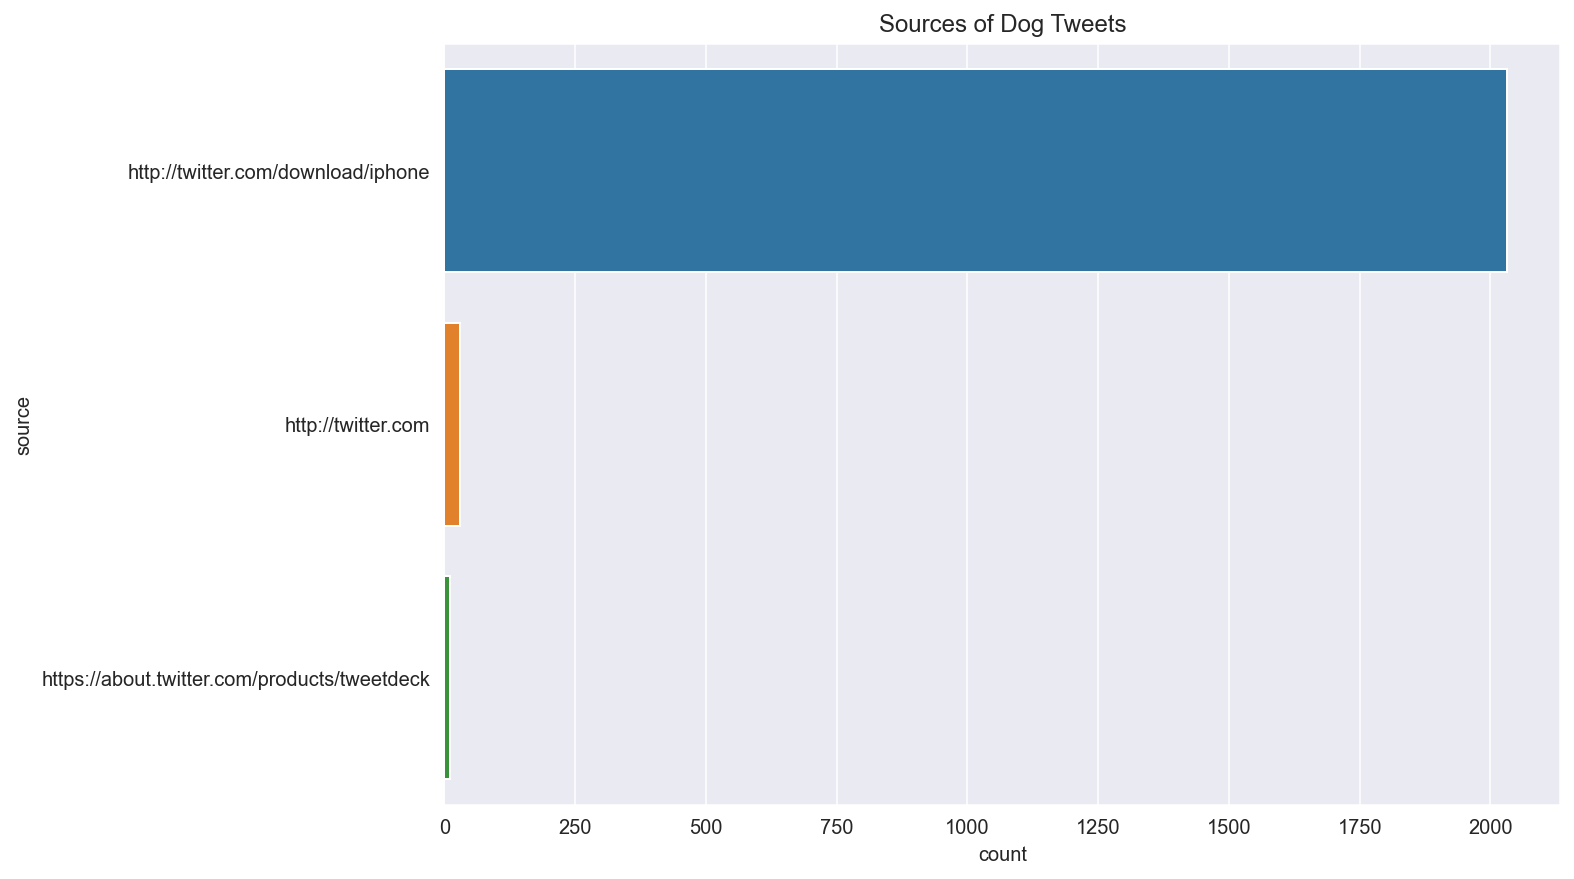

In [82]:
plt.figure(figsize=(10,7))
sb.countplot(y=master['source'],data=master);
plt.title('Sources of Dog Tweets');

### It is clear from the above visualization that most tweets came from iphone

### Insight 2 
To find if the prediction_1 of model failed to mark image as a dog, a slight change is made to the column: 
- `prediction_1_isdog` column is set to False

**What percentage did the model failed to identify the image as a dog?**

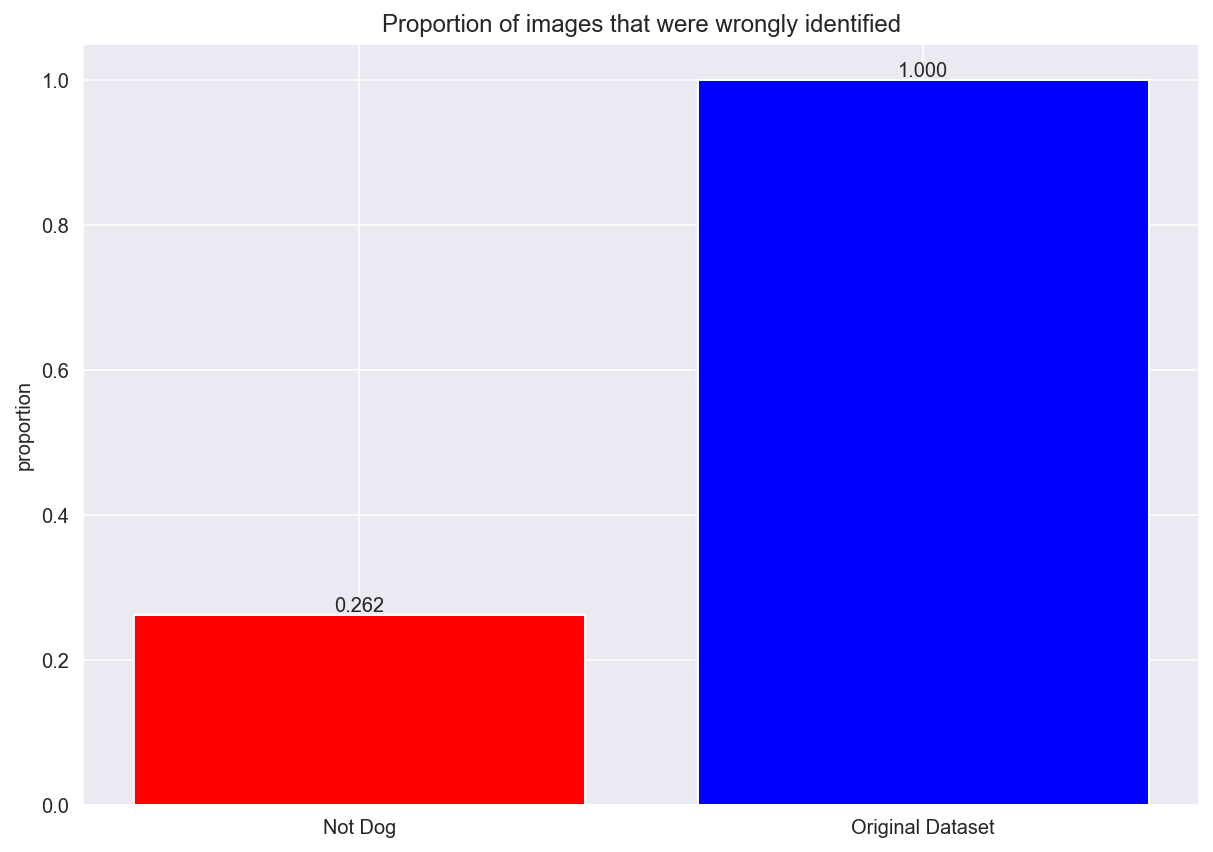

In [83]:
# Proportion of this situation
mistakes = master.query('prediction_1_isdog == False')
proportion_mistakes = mistakes.shape[0] / master.shape[0]
#print('Proportion:', proportion_mistakes)


# plotting
plt.figure(figsize=(10,7))
bar_graph = plt.bar([0, 1], [proportion_mistakes, 1], color=['red','blue'])

# setting ticks and label
plt.title('Proportion of images that were wrongly identified')
plt.xticks([0,1], ['Not Dog', 'Original Dataset'], fontsize=10);
plt.ylabel('proportion');
for rect in bar_graph:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.3f' % height, ha='center', va='bottom')

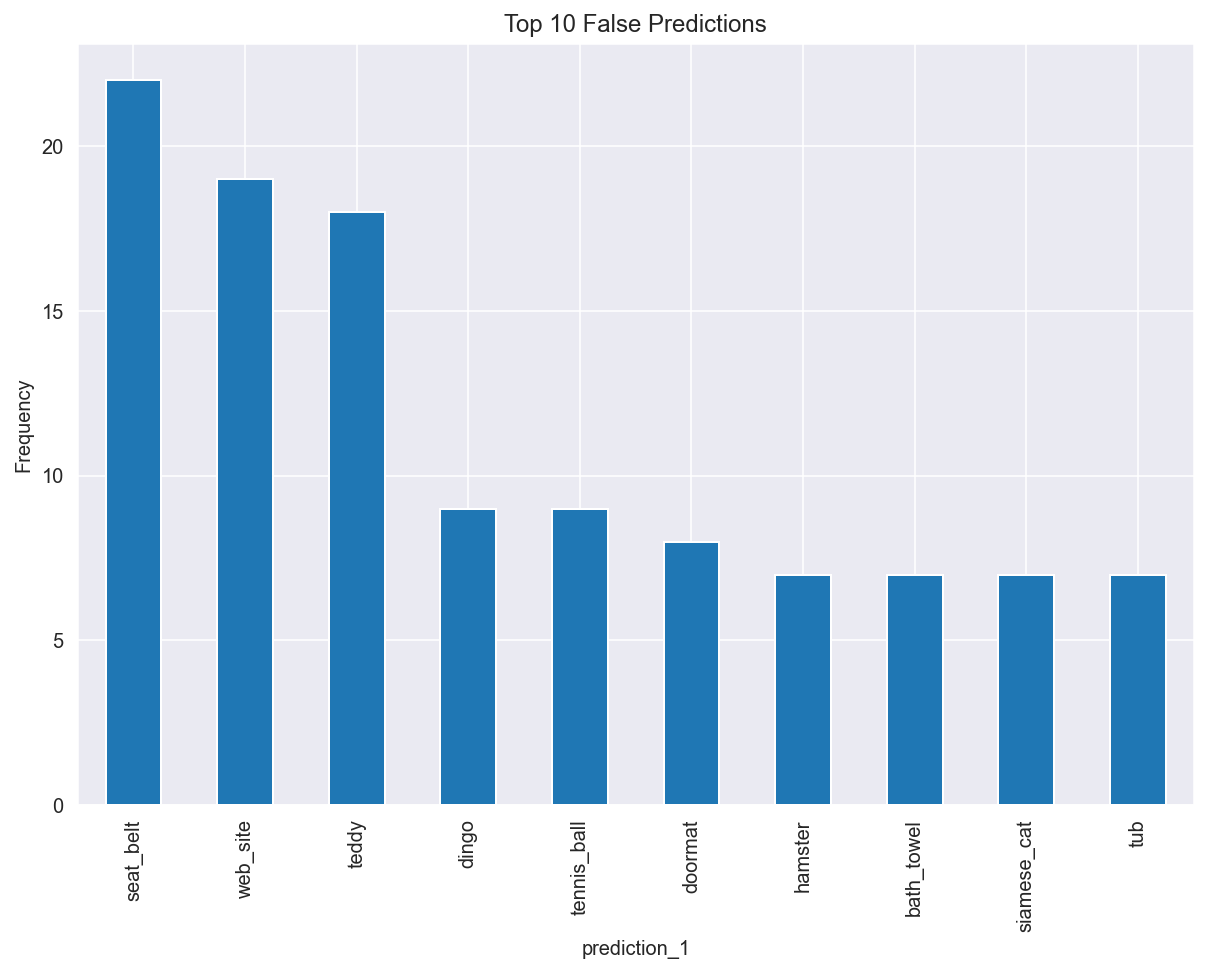

In [84]:
# Here are the top 10 false prediction by model
#mistakes.prediction_1.value_counts()[:10].plot(kind='bar', title='Top 10 mistakes', figsize=(8,5));

pred_1_vc = mistakes.prediction_1.value_counts()[:10]

# plotting
plt.figure(figsize=(10,7))
pred_1_vc.plot(kind='bar')
plt.title('Top 10 False Predictions');
plt.ylabel('Frequency')
plt.xlabel('prediction_1');

## On plotting prediction_1isdog column, it was found that 25% predictions failed to consider images for a dog

### Insight 3:


**Which are the top 25 dog breeds identified by the deep learning model?**

`prediction_1 column holds the name of dog breeds classified by the model`

In [85]:
predict_1_vc = master.prediction_1.value_counts().head(25)
predict_1_vc = predict_1_vc.sort_values(ascending=False)
predict_1_vc

golden_retriever             150
labrador_retriever           100
pembroke                      89
chihuahua                     83
pug                           57
chow                          44
samoyed                       43
toy_poodle                    39
pomeranian                    38
cocker_spaniel                30
malamute                      30
french_bulldog                26
miniature_pinscher            23
chesapeake_bay_retriever      23
seat_belt                     22
german_shepherd               20
staffordshire_bullterrier     20
siberian_husky                20
cardigan                      19
web_site                      19
eskimo_dog                    18
maltese_dog                   18
beagle                        18
shetland_sheepdog             18
teddy                         18
Name: prediction_1, dtype: int64

<font size=5><b>The dataset consist of numerous breeds. Thus, analysis is performed using top 25 breeds.</b></font>

In [86]:
list(predict_1_vc)

[150,
 100,
 89,
 83,
 57,
 44,
 43,
 39,
 38,
 30,
 30,
 26,
 23,
 23,
 22,
 20,
 20,
 20,
 19,
 19,
 18,
 18,
 18,
 18,
 18]

In [87]:
[i.title() for i in predict_1_vc.index]

['Golden_Retriever',
 'Labrador_Retriever',
 'Pembroke',
 'Chihuahua',
 'Pug',
 'Chow',
 'Samoyed',
 'Toy_Poodle',
 'Pomeranian',
 'Cocker_Spaniel',
 'Malamute',
 'French_Bulldog',
 'Miniature_Pinscher',
 'Chesapeake_Bay_Retriever',
 'Seat_Belt',
 'German_Shepherd',
 'Staffordshire_Bullterrier',
 'Siberian_Husky',
 'Cardigan',
 'Web_Site',
 'Eskimo_Dog',
 'Maltese_Dog',
 'Beagle',
 'Shetland_Sheepdog',
 'Teddy']

In [88]:
fig = px.bar(y=list(predict_1_vc),x= [i.title() for i in predict_1_vc.index])
fig.update_layout(yaxis= dict(title='Count'), 
                 xaxis = dict(title='Top 25 Dog Breeds',tickangle=-90),
                 title='Classification of Dog Breeds (prediction_1)')
fig.show()

### The successful classification generated Retriever breeds (Golden and Labrador) as most appearing breeds in WeRateDogs tweets

### Insight 4:


**Which dog names are more popular?**

In [89]:
# excluding outlier "a"
dog_names = master[master.name != "a"]
dog_names = dog_names.name.value_counts().head(11)
dog_names 

Charlie    11
Penny      10
Tucker     10
Oliver     10
Cooper     10
Lucy       10
Bo          8
Lola        8
Sadie       8
Winston     8
the         7
Name: name, dtype: int64

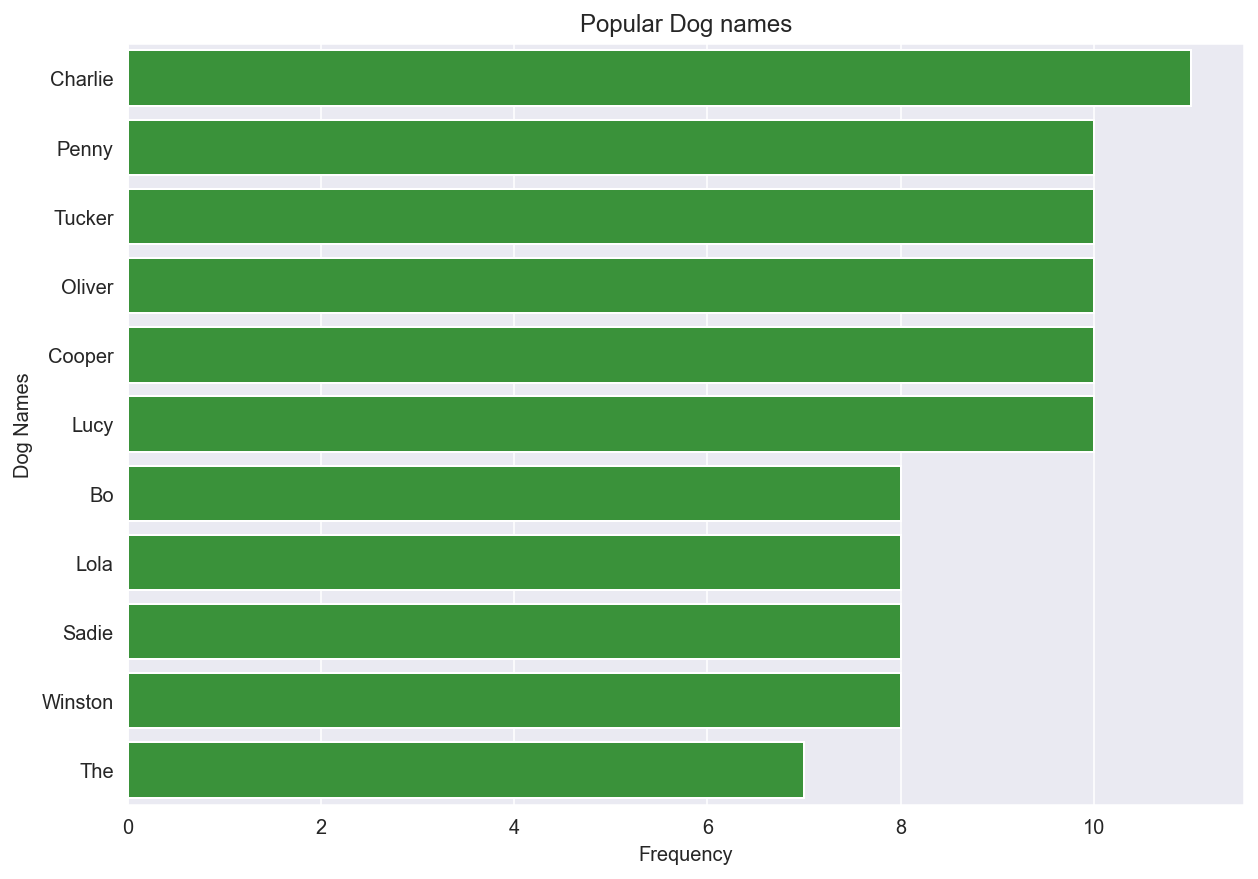

In [90]:
plt.figure(figsize=(10,7))
sb.barplot(y=[i.title() for i in dog_names.index], x = list(dog_names),
           color=sb.color_palette()[2])
plt.title('Popular Dog names')
plt.xlabel('Frequency')
plt.ylabel('Dog Names')
plt.show();

###  Charlie,Oliver, Lucy, Cooper, Tucker and Penny are more popular than other names.  Names like Winston, Lola, Bo, Sadie are also lovable dog names.

### Insight 5:

**Which dog stage was able to get highest ratings?**

`Dog ratings are determined based on rating_numerator column`

In [91]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   id                       2075 non-null   object             
 1   date                     2073 non-null   datetime64[ns, UTC]
 2   name                     1496 non-null   object             
 3   dog_stage                320 non-null    object             
 4   source                   2073 non-null   object             
 5   followers_count          2073 non-null   float64            
 6   favorite_count           2073 non-null   float64            
 7   retweet_count            2073 non-null   float64            
 8   rating_numerator         2073 non-null   float64            
 9   rating_denominator       2073 non-null   float64            
 10  jpg_url                  2075 non-null   object             
 11  prediction_1             2075 

In [92]:
master.groupby('dog_stage').mean()

,followers_count,favorite_count,retweet_count,rating_numerator,rating_denominator,prediction_1_confidence,prediction_1_isdog,prediction_2_confidence,prediction_2_isdog,prediction_3_confidence,prediction_3_isdog
dog_stage,,,,,,,,,,,
doggo,3.200907e+06,18200.776119,7901.552239,11.970149,10.0,0.581910,0.761194,0.159575,0.776119,0.060745,0.701493
"doggo,floofer",3.200892e+06,17169.000000,3433.000000,11.000000,10.0,0.354733,1.000000,0.177538,1.000000,0.131706,1.000000
"doggo,pupper",3.200912e+06,10254.363636,5262.909091,11.181818,10.0,0.844620,0.909091,0.076483,0.818182,0.026425,0.636364
"doggo,puppo",3.200891e+06,47844.000000,19196.000000,13.000000,10.0,0.321676,1.000000,0.115138,1.000000,0.096100,1.000000
floofer,3.200924e+06,13206.000000,4968.714286,12.000000,10.0,0.609204,1.000000,0.155319,1.000000,0.047997,0.857143
pupper,3.200947e+06,6957.814286,2468.209524,10.677476,10.0,0.602984,0.704762,0.131240,0.728571,0.057090,0.700000
puppo,3.200907e+06,20643.739130,6431.434783,12.000000,10.0,0.721344,0.826087,0.140264,0.913043,0.043497,0.956522


In [93]:
# using groupby on dog_stage and calculate the mean rating for each group
stages_dog = master.groupby('dog_stage')['rating_numerator'].mean()
stages_dog = stages_dog.sort_values(ascending=False)
stages_dog

dog_stage
doggo,puppo      13.000000
puppo            12.000000
floofer          12.000000
doggo            11.970149
doggo,pupper     11.181818
doggo,floofer    11.000000
pupper           10.677476
Name: rating_numerator, dtype: float64

In [94]:
fig = px.bar(x=list(stages_dog),y= [i.title() for i in stages_dog.index])
fig.update_layout(xaxis= dict(range=[8,14],title='Average Rating'), 
                 yaxis = dict(title='Dog Stage'),
                 title='Average Rating of each dog stage')
fig.show()

## Pupper was rated least while Doggo,Puppo recieved the highest ratings on WeRateDogs

# Resources used:
- https://stackoverflow.com/questions/2076343/extract-string-from-between-quotations/2076356#2076356
- https://stackoverflow.com/questions/40489821/how-to-write-text-above-the-bars-on-a-bar-plot-python/40491960
- https://stackoverflow.com/questions/55704058/how-to-set-the-range-of-y-axis-in-plotly-line-plot
- https://plotly.com/python/bar-charts/#rotated-bar-chart-labels